# TGA

In [1]:
%load_ext autoreload
%autoreload 2
%cd ../..

/Users/esgalu/Documents/maestria_unal/phosphorene_research


## Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [46]:
PRINCIPAL_PATH = 'data'
CO2_PATH = os.path.join(PRINCIPAL_PATH, 'TGA', 'FOSFORENO CO.txt')

## Core

In [119]:
os.listdir(os.path.join(PRINCIPAL_PATH, 'TGA'))

['fosforeno CO2-1.txt', 'FOSFORENO CO.txt', 'fosforeno H2.txt']

fosforeno co2-1
% adsorcion entre 400 hasta 50 grados (enfriamiento):  2.6466030420398
% adsorcion a 50 grados (isoterma):  0.1502131540090943
% adsorcion entre 400 hasta 50 grados (enfriamiento y final isoterma):  2.796816196048894

fosforeno co
% adsorcion entre 400 hasta 50 grados (enfriamiento):  2.2400054865701975
% adsorcion a 50 grados (isoterma):  0.1399608083102919
% adsorcion entre 400 hasta 50 grados (enfriamiento y final isoterma):  2.3799662948804894

fosforeno h2
% adsorcion entre 400 hasta 50 grados (enfriamiento):  0.7169479779324348
% adsorcion a 50 grados (isoterma):  0.058599448758243966
% adsorcion entre 400 hasta 50 grados (enfriamiento y final isoterma):  0.7755474266906788



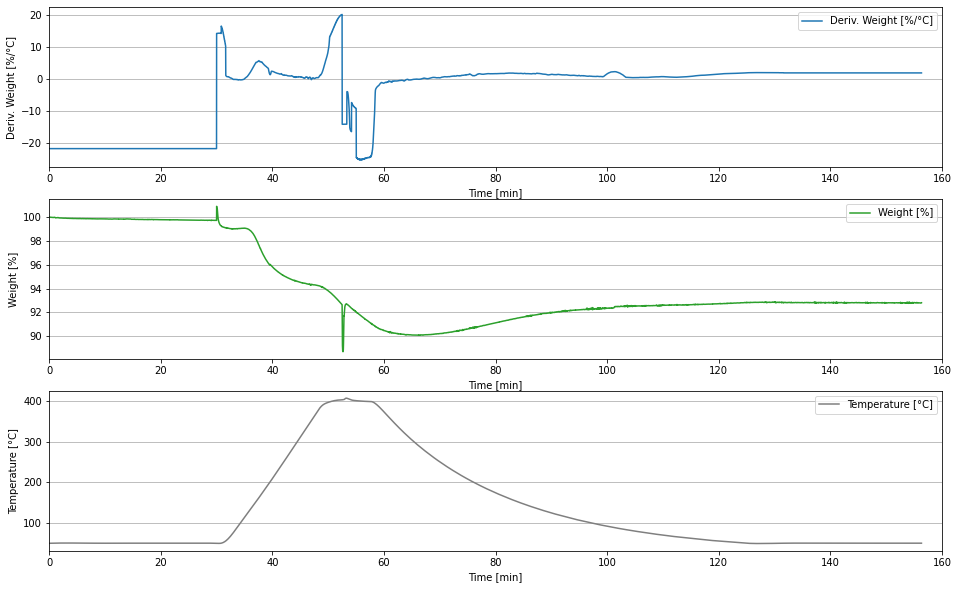

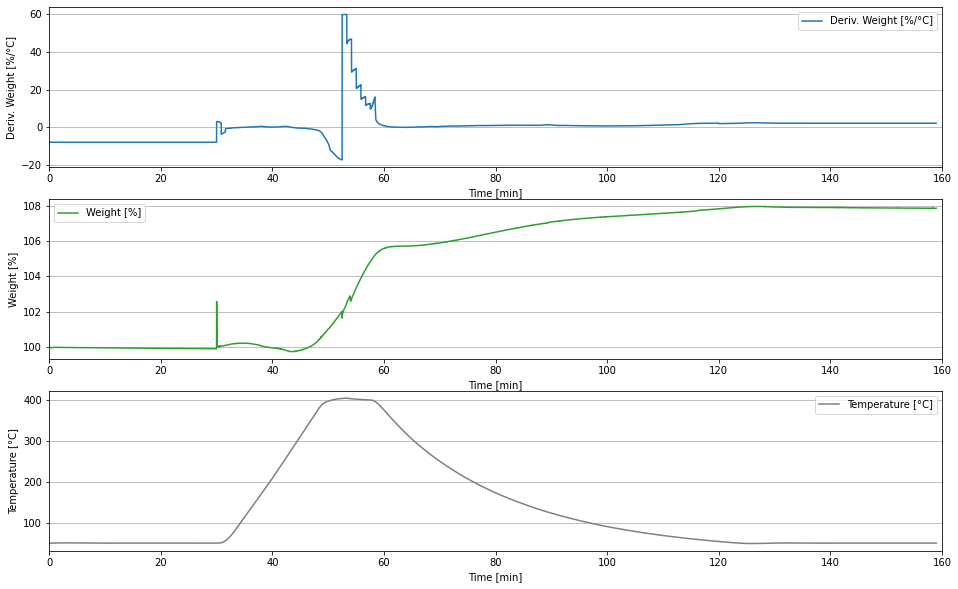

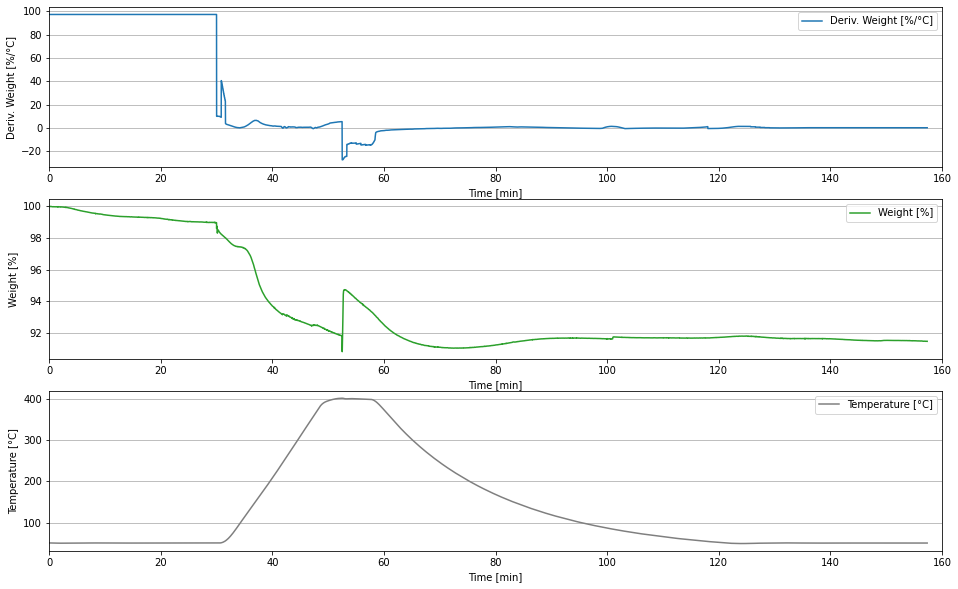

In [121]:
df_dic = {}

for file in os.listdir(os.path.join(PRINCIPAL_PATH, 'TGA')):

    PATH = os.path.join(PRINCIPAL_PATH, 'TGA', file)
    df = pd.read_csv(
        PATH,
        skiprows=98,
        engine='python',
        sep='/t',
        header=None
    )

    df = df[df[0] != ('\x00')]
    df[0] = df[df[0] != '']

    df[0] = df[0].str.replace('\x00','')

    df[[
        'Time [min]',
        'Temperature [°C]',
        'Weight [mg]',
        'Deriv. Weight [%/°C]'
       ]] = df[0].str.split(' ', expand=True)

    df = df.drop(columns=[0])
    
    for col in df:
        df[col] = df[col].map(float)

    df = df[df['Time [min]'] > 0]

    masa_0 = df['Weight [mg]'].iloc[0]
    df['Weight [%]'] = ((df['Weight [mg]']/masa_0)) * 100
    df['Deriv. Weight [%/°C]'] = df['Deriv. Weight [%/°C]'] * 100
    
    df_dic[file[:-4].lower()] = df.copy()
    
    fig = plt.figure(figsize=(16,10))

    ax1 = plt.subplot(3,1,1) 
    color = 'tab:blue'
    ax1.set_xlabel('Time [min]') 
    ax1.set_ylabel('Deriv. Weight [%/°C]')
    ax1.set_xlim(0, 160)
    ax1.plot(
        df['Time [min]'],
        df['Deriv. Weight [%/°C]'],
        label = 'Deriv. Weight [%/°C]',
        color = color) 
    ax1.legend()
    ax1.yaxis.grid()

    ax2 = plt.subplot(3,1,2)
    color = 'tab:green'
    ax2.set_ylabel('Weight [%]')
    ax2.set_xlabel('Time [min]') 
    ax2.set_xlim(0, 160)
    ax2.plot(
        df['Time [min]'],
        df['Weight [%]'],
        label = 'Weight [%]',
        color = color) 
    ax2.legend()
    ax2.yaxis.grid()

    ax3 = plt.subplot(3,1,3)

    color = 'tab:gray'
    ax3.set_ylabel('Temperature [°C]')
    ax3.set_xlabel('Time [min]') 
    ax3.set_xlim(0, 160)
    ax3.plot(
        df['Time [min]'],
        df['Temperature [°C]'],
        label = 'Temperature [°C]',
        color = color) 
    ax3.legend()
    ax3.yaxis.grid()

    fig.savefig(f'{file[:-4].lower()}.png')
    #print('saved plot', file[:-4].lower())
    
    cond_time_min_1 = df['Time [min]'] >= 60 
    cond_time_max_1 = df['Time [min]'] < 80

    cond_time_max_2 = df['Time [min]'] < 120

    cond_time_max_3 = df['Time [min]'] <= 160

    val_400c = df[cond_time_min_1 & cond_time_max_1]['Weight [%]'].min()
    val_50c1 = df[~cond_time_max_1 & cond_time_max_2]['Weight [%]'].max()
    val_50c2 = df[~cond_time_max_2 & cond_time_max_3]['Weight [%]'].max()

    max_adsorcion_400_50 = val_50c1 - val_400c
    adsorcion_isoterma = val_50c2 - val_50c1
    max_adsorcion_punto_caliente_hasta_final_isoterma = val_50c2 - val_400c

    print(file[:-4].lower())
    print('% adsorcion entre 400 hasta 50 grados (enfriamiento): ', max_adsorcion_400_50)
    print('% adsorcion a 50 grados (isoterma): ', adsorcion_isoterma)
    print('% adsorcion entre 400 hasta 50 grados (enfriamiento y final isoterma): ', max_adsorcion_punto_caliente_hasta_final_isoterma)
    print()

In [118]:
val_50c1

91.75094745949008

In [ ]:
val_400c
val_50c1
val_50c2